CPU times: total: 453 ms
Wall time: 713 ms


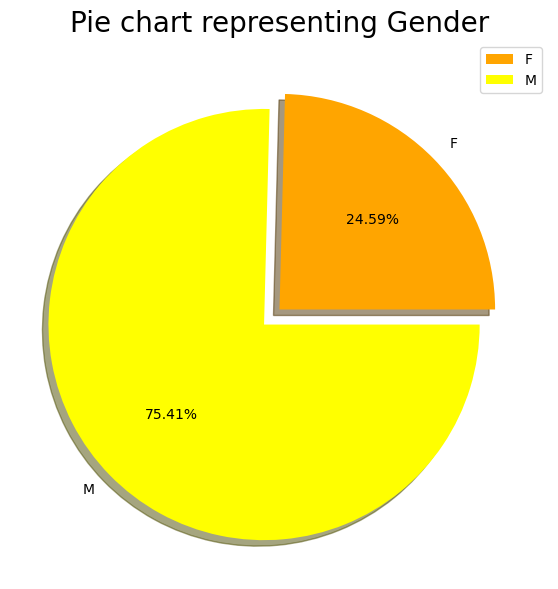

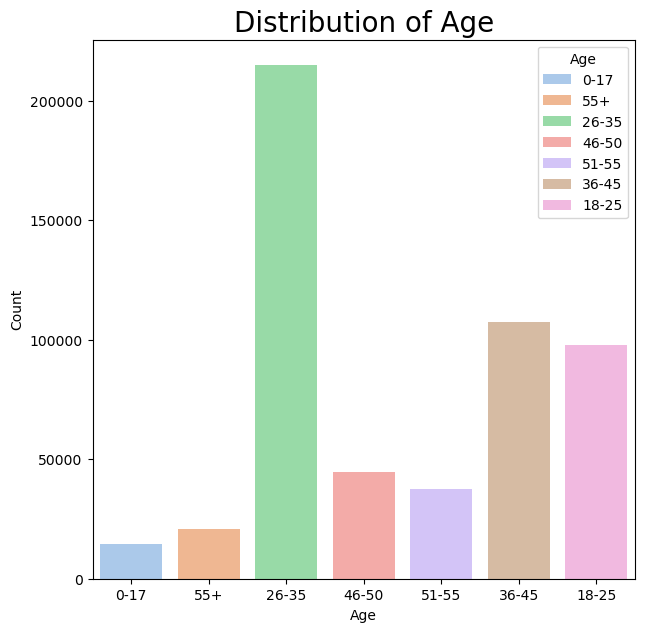

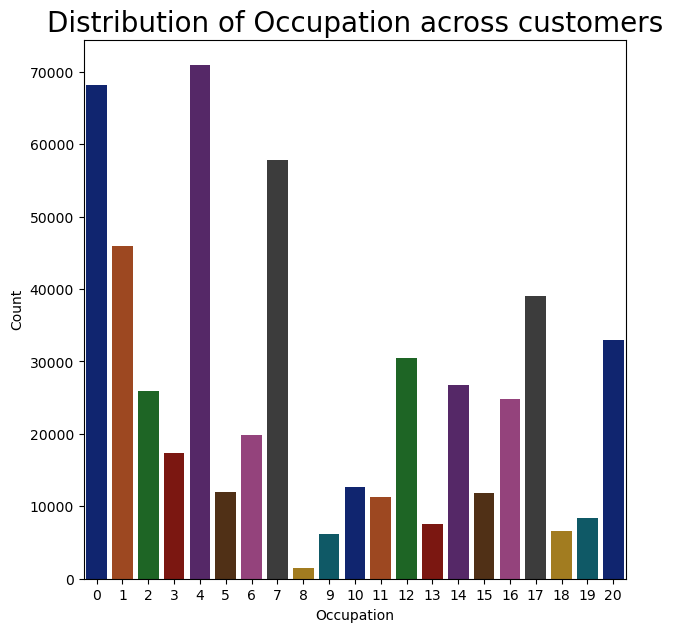

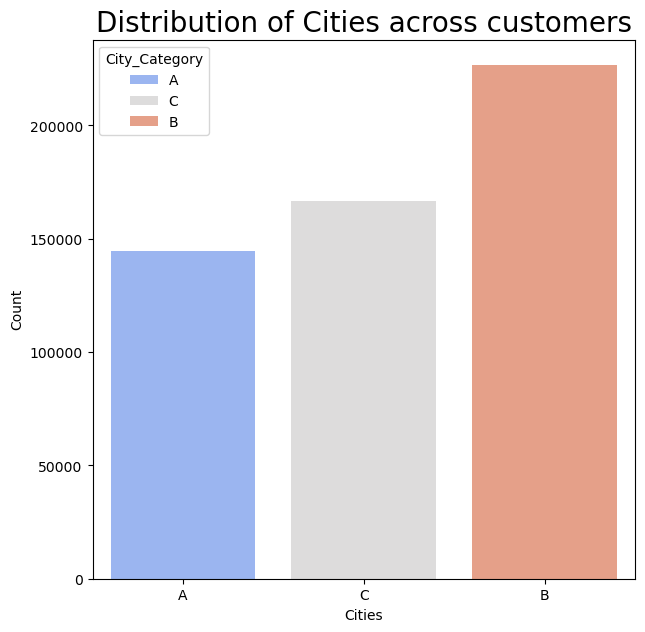

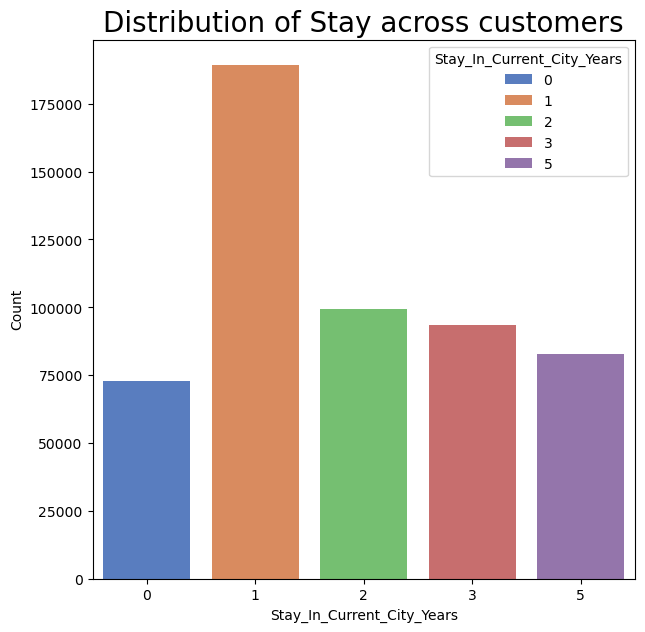

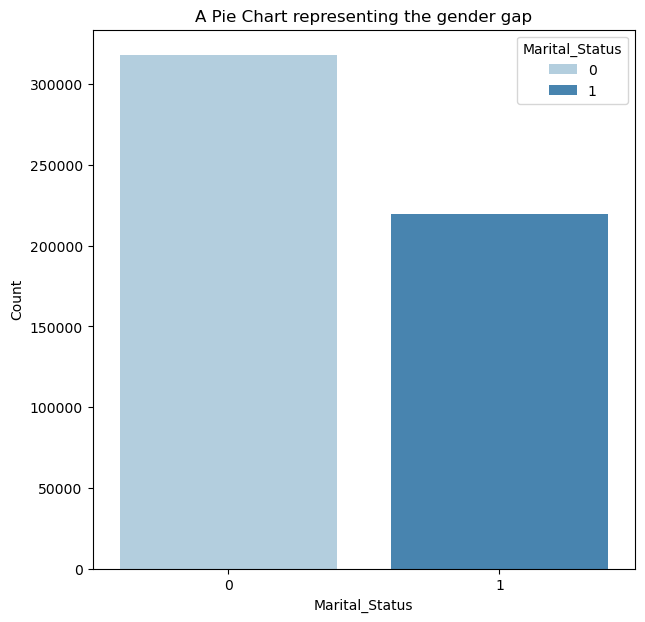

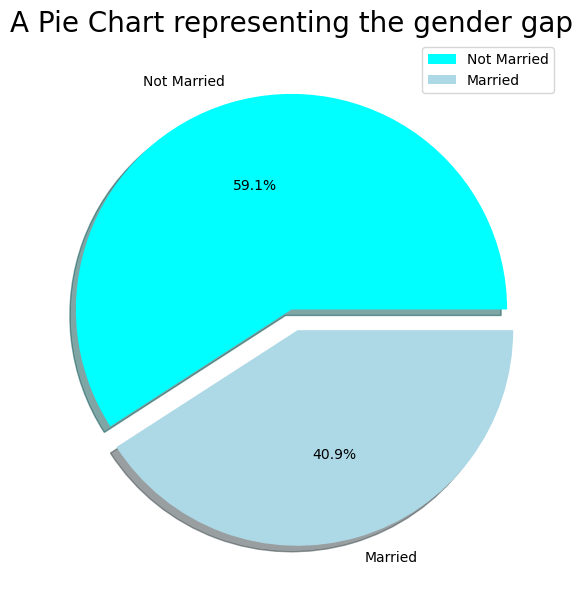

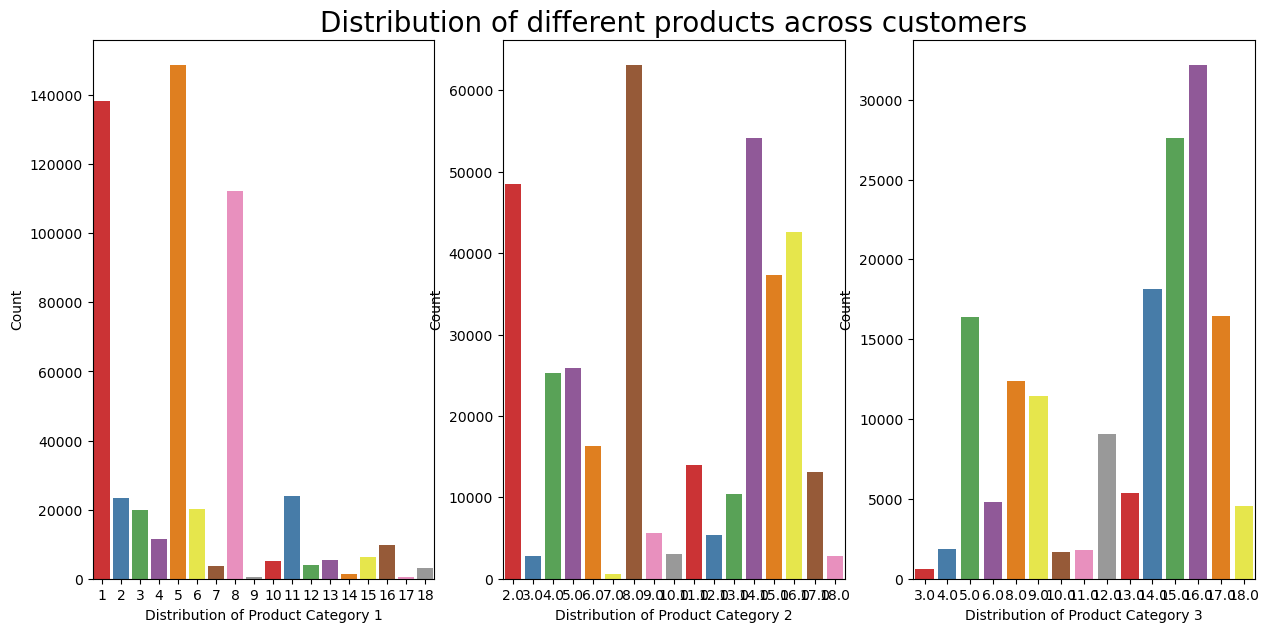

9333.859852635065 4981.022132656483
The mu 9333.859852635065 and sigma 4981.017499809046 for the curve.


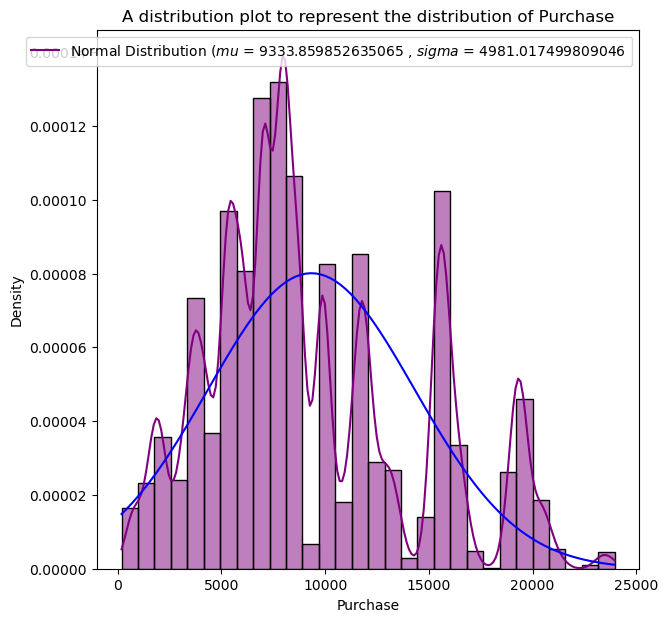

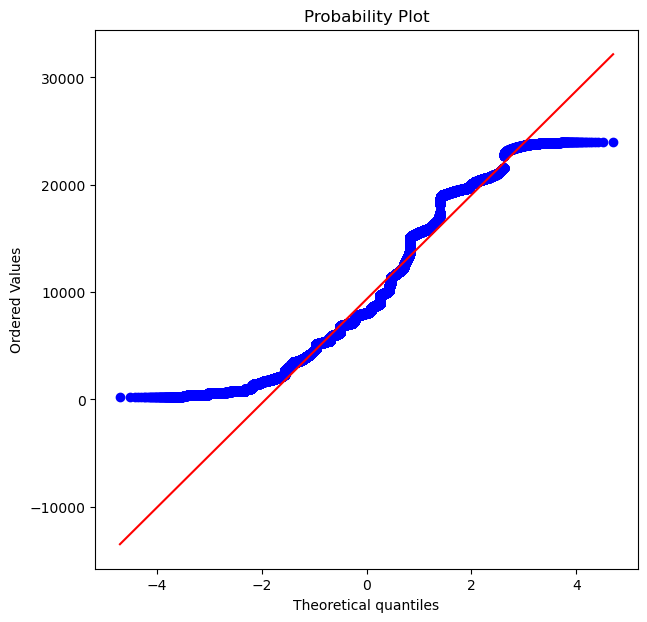

Shape of x_train:  (376303, 18)
Shape of x_test:  (161274, 18)
Shape of y_train:  (376303,)
Shape of y_test:  (161274,)
The mse is 21495394.127848558 and rmse is 4636.312557178232 
r2score is  0.13212244876042667
The $mse$ is 21495525.0102424 and $rmse$ is 4636.326672080215
r2score is  0.13211716437760546
The mse is 21691157.961596336 and rmse is 4657.3767253247115 
r2score is  0.12421847474423608


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%time df = pd.read_csv("Downloads/BlackFriday.csv")
df.isna().sum()
size=[df["Gender"].value_counts()["F"], df["Gender"].value_counts()["M"]]
labels = df["Gender"].unique()
colors = ["Orange","Yellow"]
explode=[0,0.1]
plt.pie(size,colors=colors,labels=labels,shadow=True,explode=explode,autopct="%0.2f%%")
plt.title("Pie chart representing Gender", fontsize=20)
plt.legend()
plt.show()

#Finding maximum and minimum purchase of both the genders
df.groupby(df["Gender"]).Purchase.max()
df.groupby(df.Gender).Purchase.min()

# checking dependency of gender on purchase by calculating mean
df[["Purchase" , "Gender"]].groupby("Gender").mean()

# visualizing the age of customers
sns.countplot(x="Age", data=df, hue="Age", legend=True, palette="pastel")
plt.title("Distribution of Age", fontsize=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# checing the dependency of age attribute with purchasing power using mean
df[["Purchase", "Age"]].groupby("Age").mean()

# visualizing the occupation of customers
sns.countplot(x="Occupation", data=df, hue="Occupation",legend=False , palette="dark")
plt.title("Distribution of Occupation across customers", fontsize=20)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

# checking the dependency of occupation on purchasing power using mean
df[["Purchase","Occupation"]].groupby("Occupation").mean()

# visulaizing the cities the customers are from
sns.countplot(x="City_Category", data=df, hue="City_Category", legend=True, palette="coolwarm")
plt.title("Distribution of Cities across customers",fontsize=20)
plt.xlabel("Cities")
plt.ylabel("Count")
plt.show()

# checking the dependency of cities where custoer live with the purchasing power using mean
df[["City_Category" , "Purchase"]].groupby("City_Category").mean()

# we need to label the 4+ to 5 to visualize the stay of customers in a city
df.Stay_In_Current_City_Years.unique()
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.map({"0":0 , "1":1, "2":2, "3":3, "4+":5})
df.Stay_In_Current_City_Years.value_counts()

# visualizing the stay in current years
sns.countplot(x="Stay_In_Current_City_Years", data=df, hue="Stay_In_Current_City_Years", legend=True, palette="muted")
plt.title("Distribution of Stay across customers",fontsize=20)
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Count")
plt.show()

# checking the dependency of stay in purchasing power using mean
df[["Purchase","Stay_In_Current_City_Years"]].groupby("Stay_In_Current_City_Years").mean()


# visualizing the Marital Status
sns.countplot(x="Marital_Status", data=df, hue="Marital_Status", legend=True, palette="Blues")
plt.title("A Pie Chart representing the gender gap")
plt.xlabel("Marital_Status")
plt.ylabel("Count")
plt.show()

size=[df.Marital_Status.value_counts()[0] , df.Marital_Status.value_counts()[1]]
label = ["Not Married" , "Married"]
explode = [0,0.1]
color = ['cyan', 'lightblue']
plt.pie(size, labels=label , explode=explode, shadow=True, autopct="%0.1f%%" , colors=color)
plt.title("A Pie Chart representing the gender gap",fontsize=20)
plt.legend()
plt.show()

# checking the dependency of marital status on purchasing power using mean
df[["Purchase" , "Marital_Status"]].groupby("Marital_Status").mean()

# visualizing the different product categories

plt.rcParams["figure.figsize"] = (15,7)
plt.subplot(131)
sns.countplot(x="Product_Category_1", data=df, hue="Product_Category_1", legend=False, palette="Set1")
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')


plt.subplot(132)
sns.countplot(x="Product_Category_2", data=df, hue="Product_Category_2", legend=False, palette="Set1")
plt.title("Distribution of different products across customers",fontsize=20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')


plt.subplot(133)
sns.countplot(x="Product_Category_3", data=df, hue="Product_Category_3", legend=False, palette="Set1")
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')
plt.show()


# checking the dependency of different products on purchasing power using mean
df[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()
df[['Product_Category_2', 'Purchase']].groupby('Product_Category_2').mean()
df[['Product_Category_3', 'Purchase']].groupby('Product_Category_3').mean()


# visualizing the purchase attribute which is our target variable
from scipy import stats
from scipy.stats import norm

plt.rcParams["figure.figsize"] = (7,7)

sns.histplot(df["Purchase"], kde=True,stat="density", bins=30, color="purple")
mu = df.Purchase.mean()
sigma = df.Purchase.std()

print(mu,sigma)

x_vals = np.linspace(df["Purchase"].min(), df["Purchase"].max(), 100)
y_vals = norm.pdf(x_vals,mu,sigma)

sns.lineplot(x=x_vals,y=y_vals,color="blue")

mu,sigma = norm.fit(df["Purchase"])
print("The mu {} and sigma {} for the curve.".format(mu,sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(["Normal Distribution ($mu$ = {} , $sigma$ = {} " .format(mu,sigma)], loc= "best")
plt.show()

#plotting the QQ plot
stats.probplot(df['Purchase'], plot = plt)
plt.show()

#Removing unwanted columns
user_id = df.User_ID
product_id = df.Product_ID

df_new = df.drop(["User_ID" , "Product_ID"],axis=1)
df_new.shape

#Checking and filling null values
df_new.isna().sum()
df_new.fillna({"Product_Category_2" :0}, inplace=True)
df_new["Product_Category_3"] = df_new["Product_Category_3"].fillna(0)
df_new.isna().sum()

# making dummies of variables
# in here, all the categorical or non-numerical columns gets converted to numerical values
df_new = pd.get_dummies(df_new)
df_new.head(1)

#Separating features and target values
Y = df_new.Purchase
X = df_new.drop("Purchase", axis=1)

#Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

#Splitting into training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.3,random_state=10)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

#Modeeling
#1) Ridge Regularization
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

ridge = Ridge()
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("The mse is {} and rmse is {} ".format(mse,rmse))

r2score = r2_score(y_test,y_pred)
print("r2score is ", r2score)

#2)Lasso Regularization
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

mse1 = mean_squared_error(y_test,y_pred)
rmse1 = np.sqrt(mse1)

print("The $mse$ is {} and $rmse$ is {}".format(mse1,rmse1))

r2score1 = r2_score(y_test,y_pred)
print("r2score is ", r2score1)

#3)Elastic Net
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(x_train,y_train)
y_pred = elasticnet.predict(x_test)

mse2 = mean_squared_error(y_test,y_pred)
rmse2 = np.sqrt(mse2)
print("The mse is {} and rmse is {} ".format(mse2,rmse2))

r2score2 = r2_score(y_test,y_pred)
print("r2score is ", r2score2)
